In [32]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib

importlib.reload(functions_nHits)

<module 'functions_nHits' from '/home/cgarcia_2002/nHits_count/functions_nHits.py'>

In [34]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root"
#root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P2.root"
# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)

tree = file["WCTEReadoutWindows"]  
#tree.show()
total_events = tree.num_entries

print(tree.keys())
# Load the branch into a NumPy array



['window_time', 'start_counter', 'run_id', 'sub_run_id', 'spill_counter', 'event_number', 'readout_number', 'trigger_types', 'trigger_times', 'led_gains', 'led_dacsettings', 'led_ids', 'led_card_ids', 'led_slot_numbers', 'led_event_types', 'led_types', 'led_sequence_numbers', 'led_counters', 'hit_mpmt_card_ids', 'hit_pmt_channel_ids', 'hit_mpmt_slot_ids', 'hit_pmt_position_ids', 'hit_pmt_charges', 'hit_pmt_times', 'pmt_waveform_mpmt_card_ids', 'pmt_waveform_pmt_channel_ids', 'pmt_waveform_mpmt_slot_ids', 'pmt_waveform_pmt_position_ids', 'pmt_waveform_times', 'pmt_waveforms', 'beamline_pmt_qdc_charges', 'beamline_pmt_tdc_times', 'beamline_pmt_qdc_ids', 'beamline_pmt_tdc_ids', 'hit_pmt_calibrated_times', 'hit_pmt_has_time_constant']


In [3]:
values = tree["hit_pmt_calibrated_times"].array(library="np")  # e.g., "eventID"
#print(values) 

final_elements = []
max_list = []
for x in values:

    final_elements.append(len(x))
    max_list.append(x[-1]/1000)  
    #print(x[-1])  # Print the calibrated times in seconds, excluding the last element
    #print(x[-1])
print(max(max_list))  # Print the maximum value in seconds

print(max(final_elements))  # Print the maximum number of hits in an event



269.999818359375
4415


Text(0.5, 1.0, 'Histogram of Hits per Event')

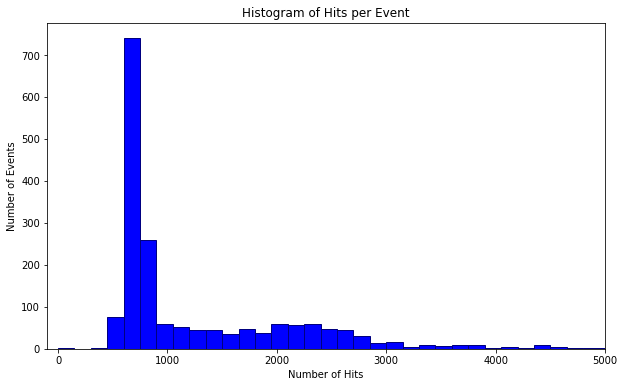

In [31]:
"""plt.figure(figsize=(10, 6))
plt.hist(final_elements, range = [0, 5000], bins=50, color='blue')
plt.xlabel('Number of Hits per Event')
plt.ylabel('Number of Events')
plt.title('Distribution of Hits per Event')"""


bin_hist = 7500/50
histogram = np.zeros(int(7500/bin_hist))  # Initialize histogram with 200 bins
histogram = functions_nHits.count_nHits(np.array(final_elements), bin_hist, histogram)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0, 7500, bin_hist), histogram, width = bin_hist, color='blue', align='edge', edgecolor='navy')
plt.xlim(-100, 5000)
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('Histogram of Hits per Event')

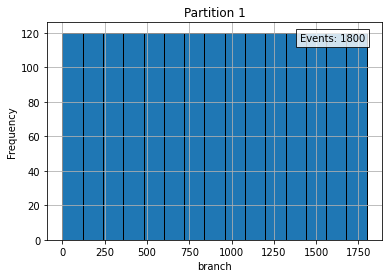

[   0    1    2 ... 1797 1798 1799]


In [17]:
values = tree["event_number"].array(library="np")  # e.g., "eventID"
# Plot a histogram
plt.hist(values, bins=15, edgecolor="black")
plt.xlabel("branch")
plt.ylabel("Frequency")
plt.grid(True)
plt.text(0.95, 0.95, f"Events: {total_events}", 
         horizontalalignment='right', verticalalignment='top',
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.title("Partition 1")
#plt.tight_layout()
plt.show()
#plt.savefig("Plots_histograms/P1/window_time.png", facecolor='white')
print(values)


In [18]:
typenames_dict = tree.typenames()

for branch_name, type_str in typenames_dict.items():
    print(f"{branch_name}: {type_str}")

window_time: double
start_counter: unknown
run_id: int32_t
sub_run_id: int32_t
spill_counter: int32_t
event_number: int32_t
readout_number: int32_t
trigger_types: std::vector<int32_t>
trigger_times: std::vector<double>
led_gains: std::vector<float>
led_dacsettings: std::vector<float>
led_ids: std::vector<int32_t>
led_card_ids: std::vector<int32_t>
led_slot_numbers: std::vector<int32_t>
led_event_types: std::vector<int32_t>
led_types: std::vector<int32_t>
led_sequence_numbers: std::vector<int32_t>
led_counters: std::vector<int32_t>
hit_mpmt_card_ids: std::vector<int32_t>
hit_pmt_channel_ids: std::vector<int32_t>
hit_mpmt_slot_ids: std::vector<int32_t>
hit_pmt_position_ids: std::vector<int32_t>
hit_pmt_charges: std::vector<float>
hit_pmt_times: std::vector<double>
pmt_waveform_mpmt_card_ids: std::vector<int32_t>
pmt_waveform_pmt_channel_ids: std::vector<int32_t>
pmt_waveform_mpmt_slot_ids: std::vector<int32_t>
pmt_waveform_pmt_position_ids: std::vector<int32_t>
pmt_waveform_times: std::v

In [22]:
times_branch = tree["hit_pmt_calibrated_times"].array(library="np")
event_number_branch = tree["event_number"].array(library="np")

range_hits = 1500
times_array = np.arange(0, 270000+1, range_hits, dtype=int)
nbins = len(times_array) 
nHits = np.zeros((tree.num_entries, nbins))

for times, event_number in zip(times_branch, event_number_branch):

    hist, _ = np.histogram(times, bins=nbins, range=(0, 270000))  # Create histogram with specified bins

    nHits[event_number, :] = hist

Text(0.5, 0, 'Tiempo (ns)')

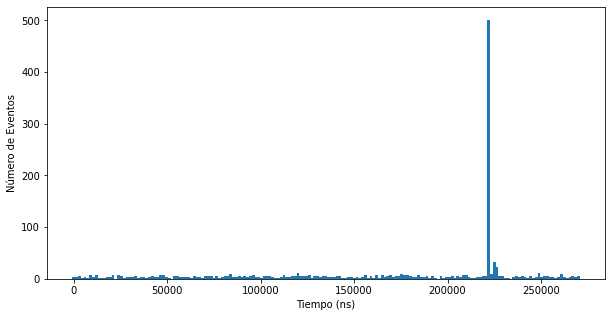

In [23]:
#PARA PLOTEAR CUALQUIER EVENTO
plt.figure(figsize=(10, 5))
plt.bar(times_array, nHits[0,::], width=range_hits)
plt.ylabel('Número de Eventos')
plt.xlabel('Tiempo (ns)')
#plt.savefig("ejemplo_prompt.png")
#plt.show()

In [9]:
# Example array
arr = nHits[435,::]

# Find index of max
max_idx = np.argmax(arr)
max_val = arr[max_idx]

# Define how many neighbors on each side you want
window = 2  # gives you 5 total: [i-2, i-1, i, i+1, i+2]

# Handle edges
start = max(0, max_idx - window)
end = min(len(arr), max_idx + window + 1)

# Extract neighbors
neighbors = arr[start:end]

print(f"Max value: {max_val} at index {max_idx}")
print(f"Neighbors: {neighbors}")


Max value: 11.0 at index 56
Neighbors: [ 6.  4. 11.  4. 10.]


In [10]:

df_nHits = pd.DataFrame(nHits, columns=[str(t) for t in times_array])
df_nHits.insert(0, "event_number", event_number_branch)
df_nHits.to_hdf("/home/cgarcia_2002/nHits_count/dataFrames_nHits/Calibrated/nHits_DataFrame_P0.h5", key="df", mode="w")


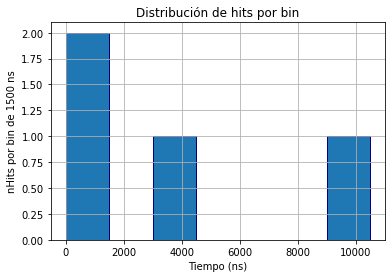

nHits: [[2. 0. 1. 0. 0. 0. 1.]]
times_array: [   0 1500 3000 4500 6000 7500 9000]


In [11]:
# Datos de ejemplo
times_branch = np.array([[0, 1000, 3000, 8000]])
event_number_branch = [0]

range_hits = 1500  # Tamaño del bin
times_array = np.arange(0, 9000+1, range_hits, dtype=int)

# Preasignamos matriz de hits
nHits = np.zeros((1, len(times_array)))

# Loop por evento
for event, event_number in zip(times_branch, event_number_branch):
    histogram, _ = np.histogram(event, bins=len(times_array), range=(0, 9000))  # Crear histograma con los bins especificados
    nHits[event_number] = histogram

# Visualización
plt.figure()
plt.bar(times_array, nHits[0], width=1500, align='edge', edgecolor='navy')
plt.xlabel("Tiempo (ns)")
plt.ylabel("nHits por bin de 1500 ns")
plt.title("Distribución de hits por bin")
plt.grid(True)
plt.show()

# Imprimir resultados
print("nHits:", nHits)
print("times_array:", times_array)
